In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_ratings = pd.read_csv('/Users/akshaikrishna/Downloads/ratings_Beauty.csv')
df_ratings

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [2]:
df_ratings.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [3]:
new_ratings = df_ratings.head(20000)

In [4]:
#To find most popular products 
favourite_products = pd.DataFrame(new_ratings.groupby('ProductId')['Rating'].count())
best_ratings = favourite_products.sort_values('Rating', ascending=False)
best_ratings.head(30)

,Rating
ProductId,
B0000530ED,584
B00004TUBL,558
B0000536P4,442
B00005A9WP,430
B000052YM7,412
B000050B6U,377
B000052YP6,341
B00005A43X,315
B000052YMR,313


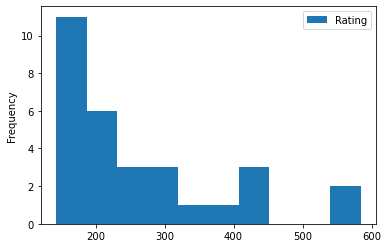

In [5]:
# Visualizing the popular products based on the ratings 
best_ratings.head(30).plot(kind = "hist")

In [104]:
#!pip install scikit-learn

In [64]:
#new_df_rating = df_ratings.drop_duplicates(['UserId', 'ProductId'])

In [65]:
#new_df_rating_pivot = new_df_rating.pivot_table(values = 'Rating', index = 'ProductId', columns = 'UserId').fillna(0)

In [66]:
#new_df_rating_matrix = csr_matrix(new_df_rating_pivot.values)

In [6]:
#import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [7]:
import pandas as pd

from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.accuracy import mae
from surprise.accuracy import rmse

from surprise import SVD
from surprise import KNNBasic

In [8]:
#utility matrix(um) to find how much the user appreciates the item
no_duplicate_df = new_ratings.drop_duplicates(['UserId', 'ProductId'])
new_ratings_um = no_duplicate_df.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
new_ratings_um.head(10)

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B00005BJ8X,B00005BJ91,B00005BL1R,B00005BLRH,B00005BWXD,B00005CDRP,B00005CDRY,B00005CDS5,B00005CDS7,B00005CDS9
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01437583CZ7V02UKZQ5S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A020135981U0UNEAE4JV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03454732N8VEYJAMGTTH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
new_ratings.size

80000

In [10]:
new_ratings_um.size

26703198

In [11]:
new_ratings_um.shape

(19101, 1398)

In [12]:
#To find the unique items and transpose the matrix
unique_item = new_ratings_um.T
unique_item.head(25)

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,...,AZYR51QTD6FAY,AZZ5ENX41WOYZ,AZZ8A0TEQOD7J,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304139212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304139220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414089X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414643X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
unique_item.size

26703198

In [14]:
# To check whether the matrix is transposed or not
unique_item.shape

(1398, 19101)

In [15]:
import sklearn
from sklearn.decomposition import TruncatedSVD

In [16]:
#To find the factorization of the matrix
SVD = TruncatedSVD(n_components=10)

In [17]:
#evaluating Singular Value Decomposition (SVD) of a matrix to find the factorization of that matrix
factorized_matrix = SVD.fit_transform(unique_item)
factorized_matrix.shape

(1398, 10)

In [18]:
corr_matrix = np.corrcoef(factorized_matrix)
corr_matrix.shape

(1398, 1398)

In [19]:
unique_item.index[86]

'5357956014'

In [20]:
X = '5357956014'

item_names = list(unique_item.index)
item_names

['0205616461',
 '0558925278',
 '0733001998',
 '0737104473',
 '0762451459',
 '1304139212',
 '1304139220',
 '130414089X',
 '130414643X',
 '1304146537',
 '130414674X',
 '1304168522',
 '1304174778',
 '1304174867',
 '1304174905',
 '1304196046',
 '1304196062',
 '1304196070',
 '1304196135',
 '1304351475',
 '1304482596',
 '1304482634',
 '1304482685',
 '1304488608',
 '1304495396',
 '1304511073',
 '1304511081',
 '1304511111',
 '130451112X',
 '1304511138',
 '1304511146',
 '1304511154',
 '1304622193',
 '1304622223',
 '1304622428',
 '1304622452',
 '1304622460',
 '1304622622',
 '1304622657',
 '1304622665',
 '1304624498',
 '1304624544',
 '1304651029',
 '1304651088',
 '130465110X',
 '1304651118',
 '1304651347',
 '1304665704',
 '1304665720',
 '130466578X',
 '1403790965',
 '1412759676',
 '1451646526',
 '1457982633',
 '1572671203',
 '1879187396',
 '1906987238',
 '1929099886',
 '1987958179',
 '3222000565',
 '322700075X',
 '3227001055',
 '3227001381',
 '3292000971',
 '3423470476',
 '360211600X',
 '40573627

In [21]:
item_ID = item_names.index(X)
item_ID

86

In [22]:
corr_item_ID = corr_matrix[item_ID]
corr_item_ID.shape

(1398,)

In [23]:
list(unique_item.index[corr_item_ID > 0.90])

['1304482634',
 '1403790965',
 '4057362894',
 '4057368825',
 '5297000963',
 '5357955786',
 '5357956014',
 '602260074X',
 '6041134473',
 '604113449X',
 '6041134511',
 '7899120217',
 '897677244X',
 '9605406446',
 '974619187X',
 '9749513444',
 '9788071163',
 '978807278X',
 '9788072828',
 '9788073409',
 '9788073859',
 '9788074286',
 '9788074367',
 '9788075649',
 '9788077315',
 '9789820615',
 '9790770154',
 '979077348X',
 '9790774907',
 '9790775253',
 '9790776098',
 '9790776292',
 '9790776381',
 '9790776489',
 '9790777884',
 '979077995X',
 '9790779968',
 '9790781512',
 '9790783531',
 '979078371X',
 '9790787294',
 '9790788711',
 '9790789343',
 '9790789351',
 '9790789939',
 '9790791968',
 '9790792115',
 '9790793111',
 '979079567X',
 '979079634X',
 '979079830X',
 '9790798393',
 '9790798954',
 '9790800525',
 '9790800851',
 '9790800916',
 '9839215019',
 'B00000374R',
 'B000005Z5L',
 'B000052Y0S',
 'B000052Y2W',
 'B000052Y6M',
 'B000052Y6V',
 'B000052YGS',
 'B000052YI1',
 'B000052YJA',
 'B000052Y

In [24]:
#KNN 

In [25]:
from scipy.sparse import csr_matrix
new_rating_matrix = csr_matrix(new_ratings_um.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(new_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [26]:
new_ratings_um

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B00005BJ8X,B00005BJ91,B00005BL1R,B00005BLRH,B00005BWXD,B00005CDRP,B00005CDRY,B00005CDS5,B00005CDS7,B00005CDS9
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01437583CZ7V02UKZQ5S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A020135981U0UNEAE4JV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZHJZP4GQPPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZNK89PXD006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZOFVMQC0BJG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
unique_item

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,...,AZYR51QTD6FAY,AZZ5ENX41WOYZ,AZZ8A0TEQOD7J,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00005CDRP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00005CDRY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00005CDS5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
q_index = np.random.choice(new_ratings_um.shape[0])
dist, ind = model_knn.kneighbors(new_ratings_um.iloc[q_index, :].values.reshape(-1398, 1398), n_neighbors = 6)

for i in range(0, len(dist.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(new_ratings_um.index[q_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, new_ratings_um.index[ind.flatten()[i]], dist.flatten()[i]))

Recommendations for A16LI3BI2HYF0:

1: A3B3OQNN45LP51, with distance of 0.0:
2: A32C23FEMZUS60, with distance of 0.0:
3: A32BKFUA52T69B, with distance of 0.0:
4: A1UOE29U7Y1Q6H, with distance of 0.0:
5: A3PZSA5TQFCMTC, with distance of 0.0:
